# Irwin-Hall distribution

https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
N = 22

d = np.random.rand(10000,N)
d = np.sum(d, axis=1) / N

e = np.random.normal(loc=0.5, scale=np.sqrt(1/(N*12)), size=10000)

In [3]:
func = scipy.stats.gaussian_kde(d)
func_ref = scipy.stats.gaussian_kde(e)

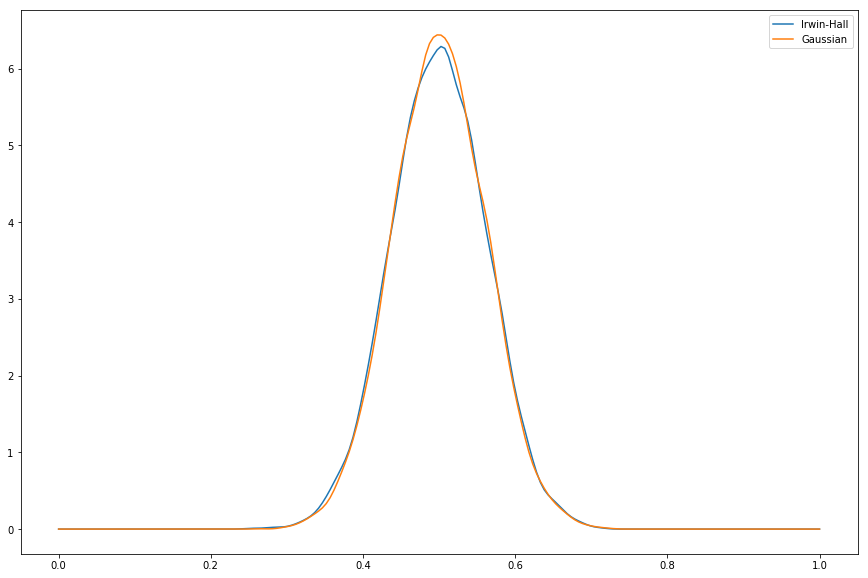

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
x = np.linspace(0,1,200)
ax.plot(x, func(x), label="Irwin-Hall")
ax.plot(x, func_ref(x), label="Gaussian")
ax.legend()
None

# Some numpy messing

In [5]:
x = np.empty((2,3))
x, x.shape

(array([[17.2, 17.2, 17.2],
        [17.2, 17.2, 17.2]]), (2, 3))

In [6]:
x[:,None] = np.asarray([1,2,3])
x, x.shape

(array([[1., 2., 3.],
        [1., 2., 3.]]), (2, 3))

In [7]:
x = np.empty((3,2))
x[:,None] = np.asarray([1,2])
x = x.T
x, x.shape

(array([[1., 1., 1.],
        [2., 2., 2.]]), (2, 3))

In [8]:
x = np.zeros(10)
x[::2] = np.asarray([1,2,3,4,5])
x, x.shape

(array([1., 0., 2., 0., 3., 0., 4., 0., 5., 0.]), (10,))

In [9]:
x[1::2] = -x[::2]
x

array([ 1., -1.,  2., -2.,  3., -3.,  4., -4.,  5., -5.])

In [10]:
x = np.empty((4,2))
x[:,None] = np.asarray([1,2])
x = x.T
print(x)
x.flatten()

[[1. 1. 1. 1.]
 [2. 2. 2. 2.]]


array([1., 1., 1., 1., 2., 2., 2., 2.])

In [11]:
x = np.asarray([1,2,3,4])
x.shape+(5,)

(4, 5)

# Simulation

We can think of each initial ancestor (out of $2^n$ choices) as having a probability vector with $2^n$ components, initially a point mass.  Then each step we mix blocks of length 2, then 4, then 8, the first half of the block being multiplied by p and the second half by 1-p, where $p\sim IH(22)$.   However, this leads to a very sparse data structure which we can actually pack into one vector of length $2^n$

In [12]:
def repeat_vector(vec, m):
    """`vec` is a 1-d vector of length `n`, then return a vector of length `n*m` with each entry repeated `m` times"""
    vec = np.asarray(vec)
    x = np.empty((m,)+(vec.shape))
    x[:,None] = vec
    return x.T.flatten()

def one_minus(vec):
    """Return [vec[0], 1-vec[0], vec[1], 1-vec[1], ...]"""
    vec = np.asarray(vec)
    y = np.empty((2,)+vec.shape)
    y[0,:] = vec
    y[1,:] = 1 - vec
    return y.T.flatten()

def irwin_hall(n, N):
    """Take `n` samples from `IR(N)`"""
    d = np.random.rand(n, N)
    return np.sum(d, axis=1) / N

def simulate(n):
    prob_vec = np.ones(2**n)
    for k in range(n):
        mult = irwin_hall(2**(n-k-1), 22)
        mult = one_minus(mult)
        mult = repeat_vector(mult, 2**k)
        prob_vec = prob_vec * mult
    return prob_vec

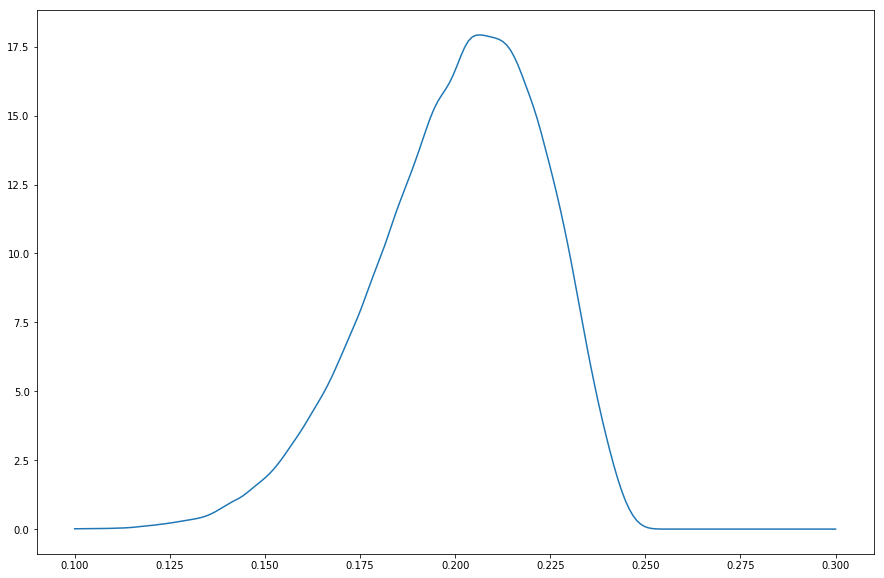

In [31]:
results = []
for _ in range(100000):
    r = simulate(2)
    results.append(np.min(r))
    
f = scipy.stats.gaussian_kde(results)
fig, ax = plt.subplots(figsize=(15,10))
x = np.linspace(0.1,0.3,200)
#x = np.linspace(0,1,200)
ax.plot(x, f(x))
None

In [36]:
results = []
for _ in range(20000):
    r = simulate(10)
    results.append(np.min(r))

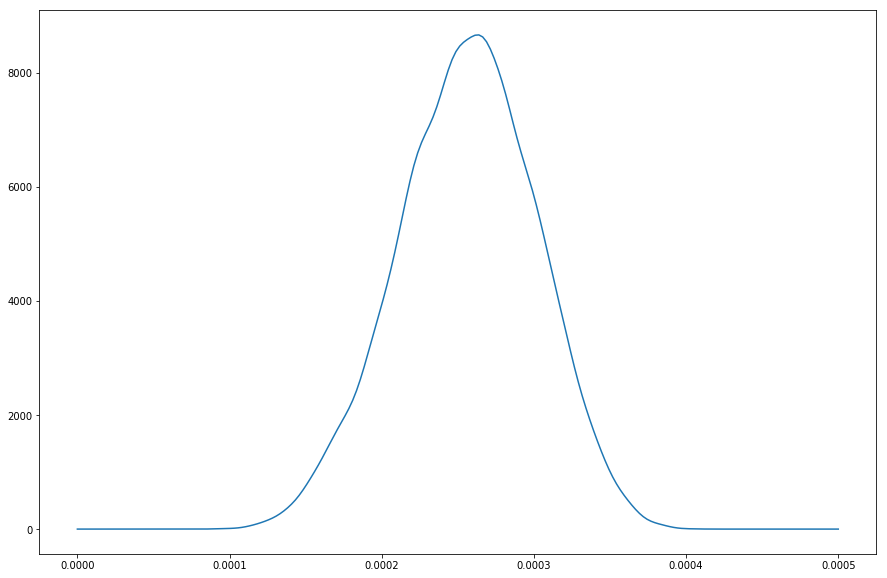

In [37]:
f = scipy.stats.gaussian_kde(results)
fig, ax = plt.subplots(figsize=(15,10))
x = np.linspace(0,0.0005,200)
ax.plot(x, f(x))
None

In [47]:
results = []
for _ in range(10000):
    r = simulate(11)
    results.append(np.min(r))

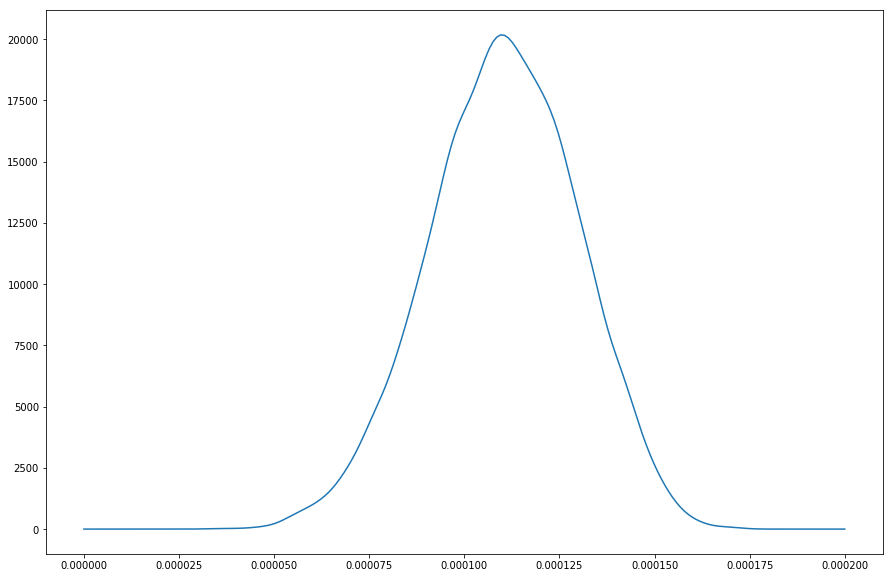

In [48]:
f = scipy.stats.gaussian_kde(results)
fig, ax = plt.subplots(figsize=(15,10))
x = np.linspace(0,0.0002,200)
ax.plot(x, f(x))
None

In [49]:
s = np.sort(results)
most = s[int(s.shape[0]*95/100)]
most

0.00014164080400948383

In [50]:
most * 3088286401

437427.3688491952

In [51]:
most * 330000

46.74146532312967

In [52]:
results = []
for _ in range(5000):
    r = simulate(12)
    results.append(np.min(r))

In [53]:
s = np.sort(results)
most = s[int(s.shape[0]*95/100)]
most

6.094523192616979e-05